# factor

factor in ggplot, factor in tibble(fct_record, fct_collapse)

In [37]:
library('tidyverse')

## 팩터형이란?

- 팩터형은 범주형 변수에 사용되는데, 범주형 변수란 가질 수 있는 값이 미리 고정되고 또 알려진 변수를 말한다.<br>
팩터형은 문자형 벡터를 알파벳순이 아닌 순서로 표시하고 싶을 때도 이용할 수 있다.<br>
팩터형이 문자형보다 다루기 쉽기에, 베이스 R의 함수들은 문자형을 자동으로 팩터형으로 변환한다.<br>
다시 말해 팩터형이 사실 도움이 되지 않는 경우에도 나타나는 경우가 많이 있다는 의미다.

`-` 월을 기록한 변수 예시

In [2]:
x1 <- c("Dec", "Apr", "Jan", "Mar")

In [3]:
x1

[1] "Dec" "Apr" "Jan" "Mar"

`-` 문자형의 경우 오타를 입력했거나 정렬을 하고자 할 때 유용한 순서로 정렬이 되지 않는다.

In [4]:
sort(x1)

[1] "Apr" "Dec" "Jan" "Mar"

- 팩터형을 만들기 위해서는 먼저 선례(?)를 만들어 주어야 한다.

In [5]:
month_levels <- c(
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    )

In [6]:
month_levels

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [7]:
y1 <- factor(x1, levels = month_levels)

In [8]:
y1

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

`-` 선례를 바탕으로 정렬

In [9]:
sort(y1)

[1] Jan Mar Apr Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

`-` 오타가 추가된 예시

In [10]:
x2 <- c("Dec", "Apr", "Jam", "Mar")

In [11]:
y2 <- factor(x2, levels = month_levels)

`-` 레벨 집합(선례)에 포함되지 않는 값은 NA로 변환된다.

In [12]:
y2

[1] Dec  Apr  <NA> Mar 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

- `parse_factor`사용하면 NA가 나올시 warning뜬다.

In [13]:
y2 <- parse_factor(x2, levels = month_levels)

Warning message:
“1 parsing failure.
row col           expected actual
  3  -- value in level set    Jam
”


`-` `levels`입력안하면 그냥 알파벳 순서로 나열

In [14]:
factor(x1)

[1] Dec Apr Jan Mar
Levels: Apr Dec Jan Mar

## factor in ggplot

`-` 설문조사 샘플 데이터

In [15]:
gss_cat %>% head

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


팩터형이 티블로 저장되면 해당하는 레벨들을 쉽게 볼 수 없는데 볼 수 있는 방법1)은 `count`이다.

In [16]:
gss_cat %>%
count(race)

race,n
<fct>,<int>
Other,1959
Black,3129
White,16395


방법2) 막대 그래프

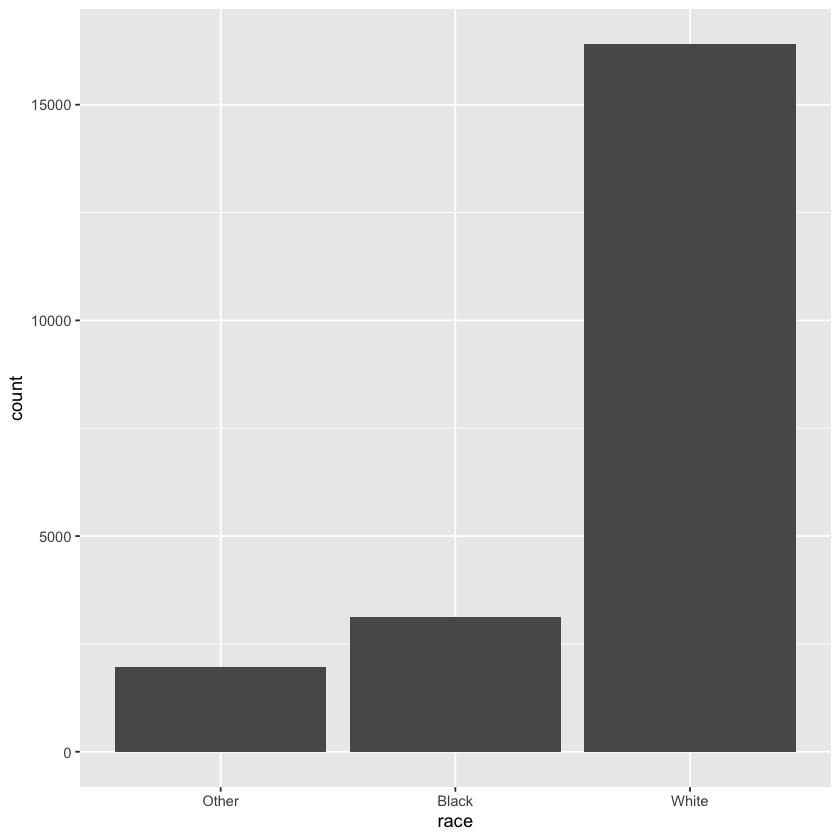

In [17]:
ggplot(gss_cat, aes(race)) + geom_bar()

`scale_x_discrete(drop = FALSE)` : ggplot에서 값이 없는 레벨을 보이게하기

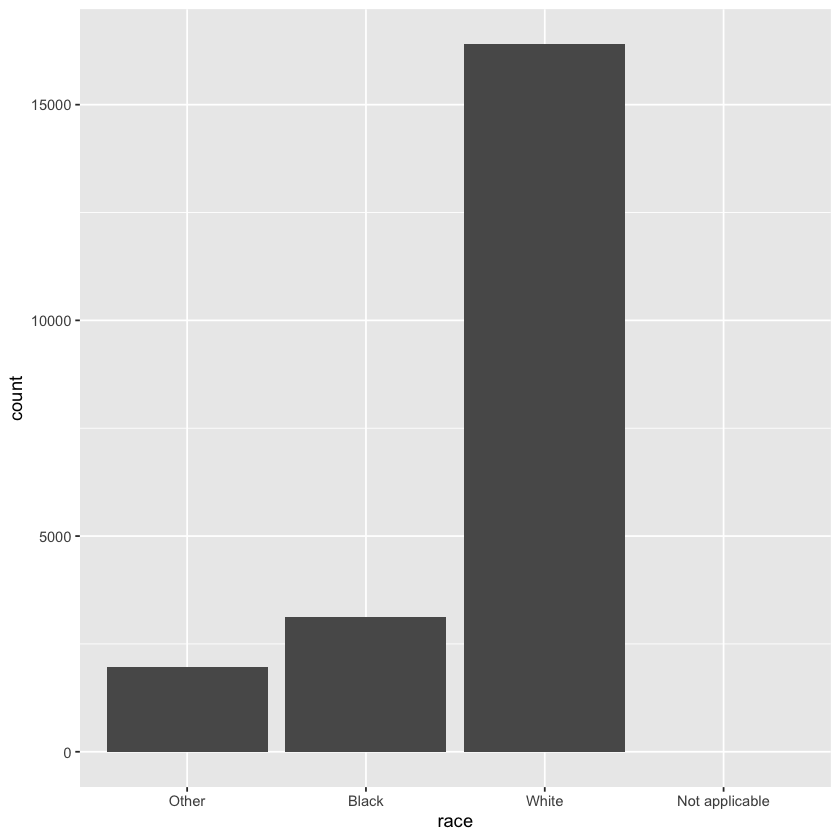

In [18]:
ggplot(gss_cat, aes(race)) +
geom_bar() +
scale_x_discrete(drop = FALSE)

유효하지만 이 데이터 셋에서 나타나지 않는 값을 나타냄

`-` 종교에 따른 하루 TV 시청시간의 평균

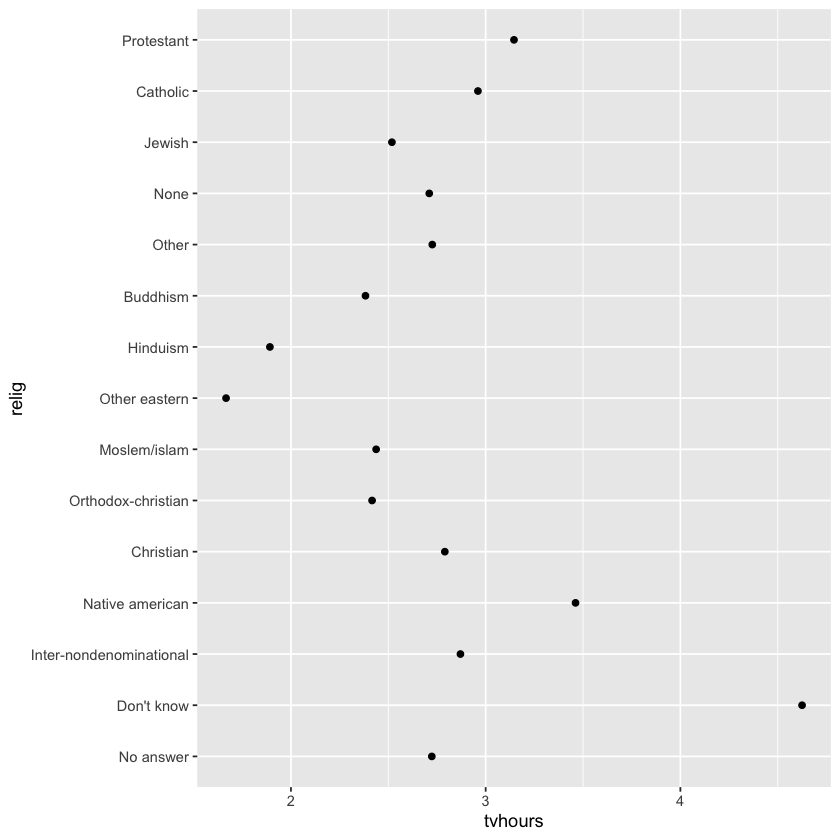

In [19]:
relig_summary <- gss_cat %>%
group_by(relig) %>%
summarize(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
    )

ggplot(relig_summary, aes(tvhours, relig)) + geom_point()

`-` tvhours순위로 religion순위 재 정렬

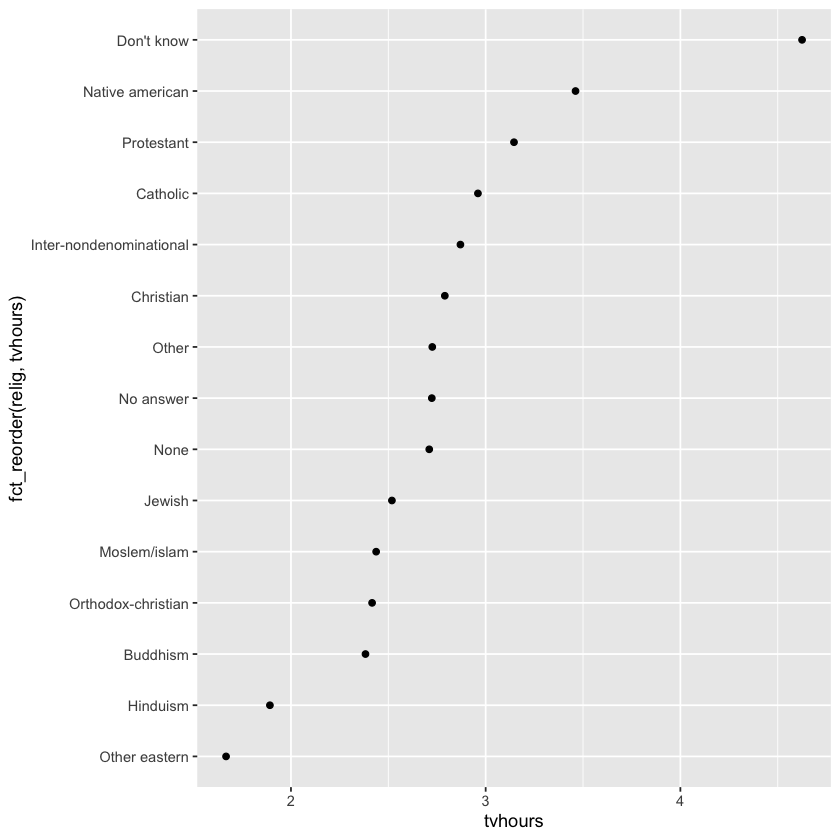

In [20]:
ggplot(relig_summary, aes(tvhours, fct_reorder(relig, tvhours))) + geom_point()

`-` tibble자체를 순서 정렬시키고 그리는 방법

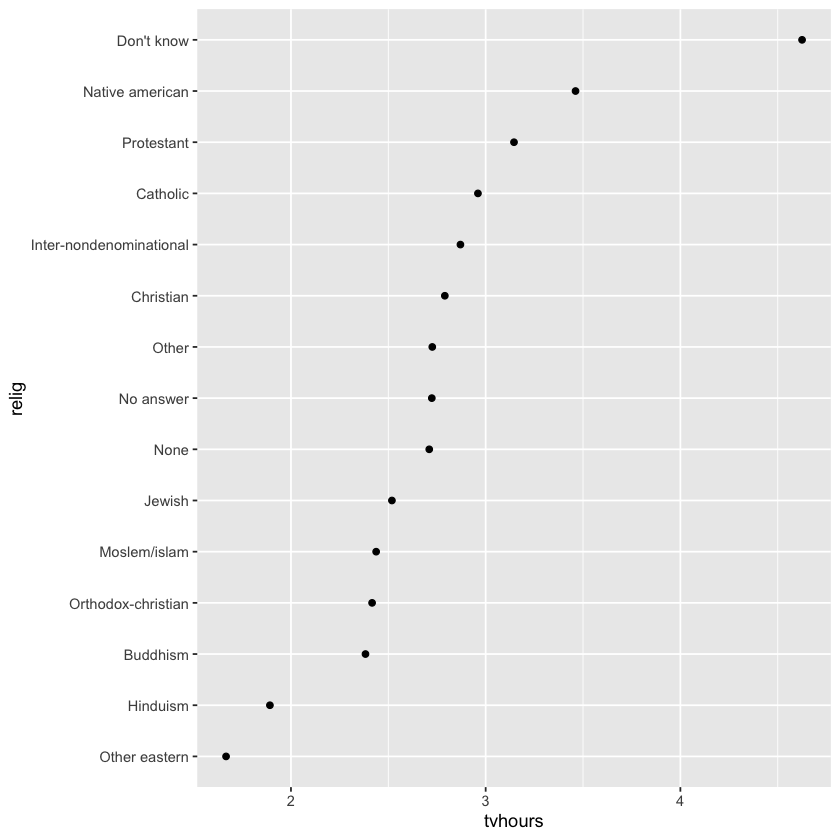

In [21]:
relig_summary %>%
mutate(relig = fct_reorder(relig, tvhours)) %>%
ggplot(aes(tvhours, relig)) +
geom_point()

`-` 보고서 소득 레벨에 따라 평균나이가 어떻게 변화하는지 보여주는 plot

In [22]:
rincome_summary <- gss_cat %>%
group_by(rincome) %>%
summarize(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
    )

In [23]:
rincome_summary

rincome,age,tvhours,n
<fct>,<dbl>,<dbl>,<int>
No answer,45.45029,2.904762,183
Don't know,45.60902,3.411290,267
Refused,47.61082,2.481973,975
$25000 or more,44.21217,2.234208,7363
$20000 - 24999,41.53365,2.784753,1283
$15000 - 19999,39.96180,2.912245,1048
$10000 - 14999,41.11301,3.016541,1168
$8000 to 9999,41.08235,3.148571,340
$7000 to 7999,38.24468,2.645455,188


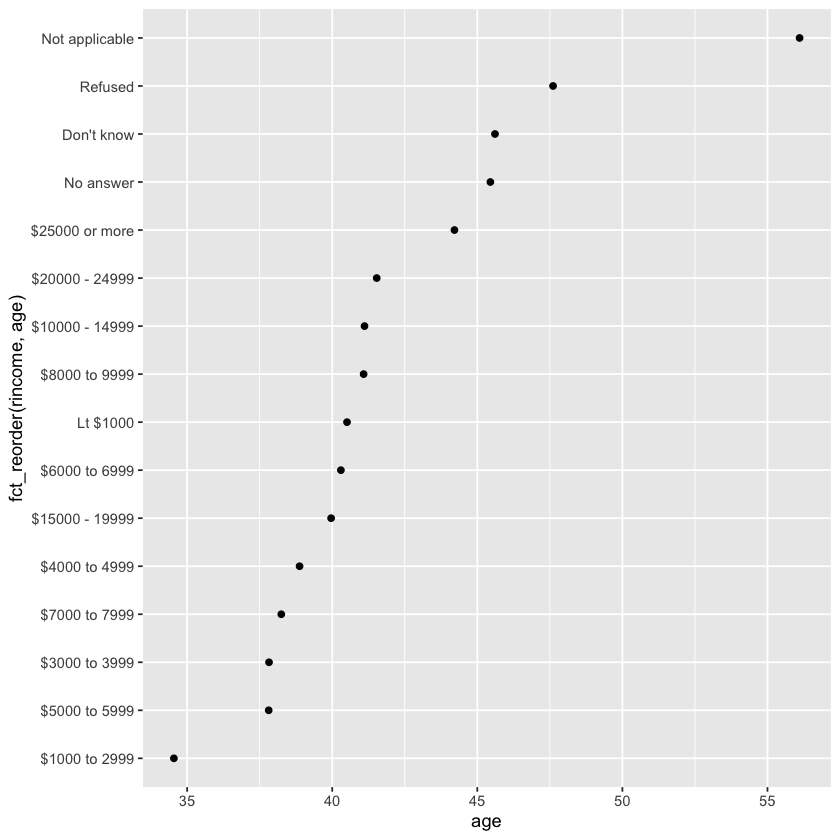

In [24]:
ggplot(rincome_summary, aes(age, fct_reorder(rincome, age))) + geom_point()

`-` 해당없음(Not applicable)을 다른 특별한 레벨들과 함께 앞으로 가져오기

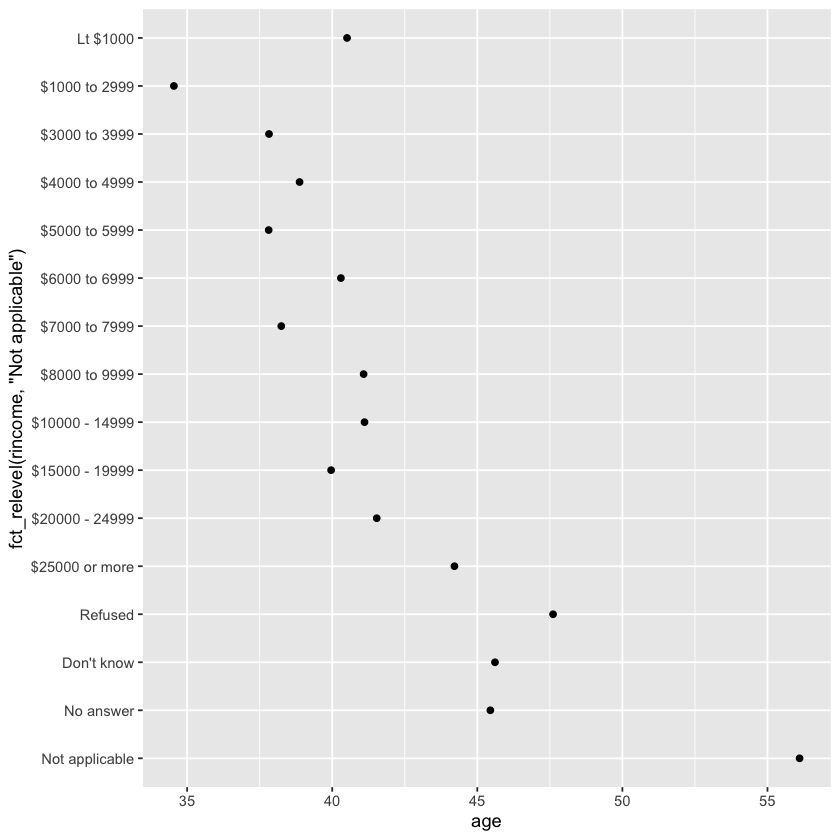

In [25]:
ggplot(rincome_summary, aes(age, fct_relevel(rincome, "Not applicable"))) +
geom_point()

In [26]:
by_age <- gss_cat %>%
filter(!is.na(age)) %>%
count(age, marital) %>%
group_by(age) %>%
mutate(prop = n / sum(n))

In [27]:
by_age %>% head

age,marital,n,prop
<int>,<fct>,<int>,<dbl>
18,Never married,89,0.978021978
18,Married,2,0.021978022
19,Never married,234,0.939759036
19,Divorced,3,0.012048193
19,Widowed,1,0.004016064
19,Married,11,0.044176707


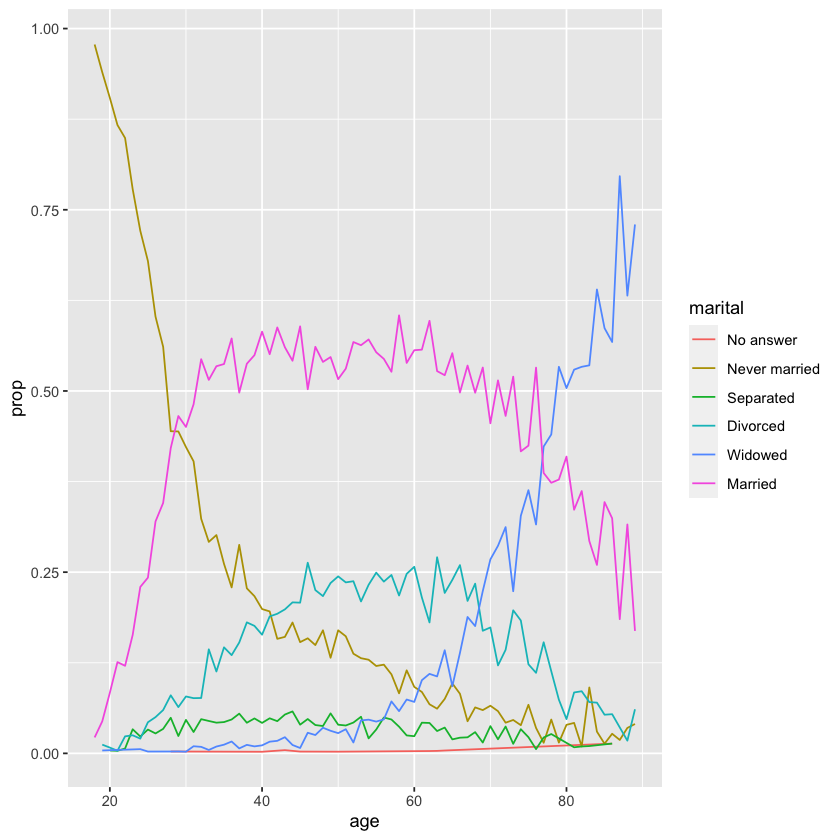

In [28]:
ggplot(by_age, aes(age, prop, color = marital)) +
geom_line(na.rm = TRUE)

`fct_reorder2` : 가장 큰 x값과 연관된 y값으로 팩터형을 재정렬한다.<br>
선 색상은 범례와 정렬되므로 이렇게 하면 plot읽기가 쉬워진다.

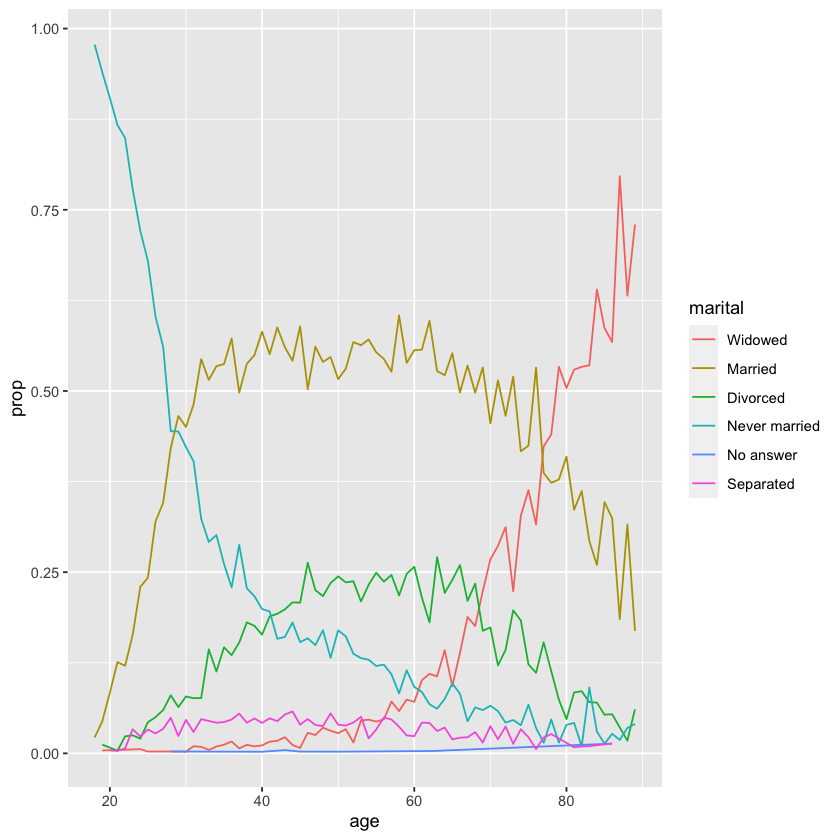

In [29]:
ggplot(by_age, aes(age, prop, color = fct_reorder2(marital, age, prop))) +
geom_line() +
labs(color = "marital")

`fct_infreq` : 빈도 오름차순으로 레벨 정렬

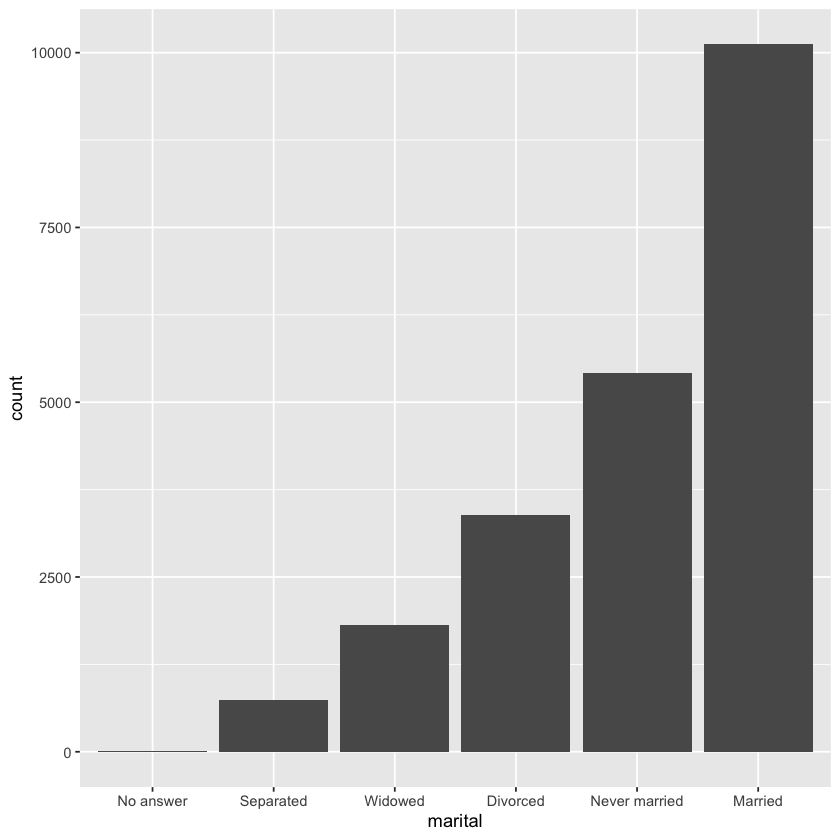

In [30]:
gss_cat %>%
mutate(marital = marital %>% fct_infreq() %>% fct_rev()) %>%
ggplot(aes(marital)) +
geom_bar()

## tibble속 factor값 수정

In [31]:
gss_cat %>% count(partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690


`fct_recode` : 미리 입력한 대로 팩터 값을 바꿔준다(명시적으로 언급하지 않은 것은 그대로 둠)

In [32]:
gss_cat %>%
mutate(partyid = fct_recode(partyid,
                            "Repubican, strong"     = "Strong republican",
                            "Repubican, weak"       = "Not str republican",
                            "Independent, near rep" = "Ind,near rep",
                            "Independent, near dem" = "Ind,near dem",
                            "Democrat, weak"        = "Not str democrat",
                            "Democrat, strong"      = "Strong democrat"
                            )) %>%
count(partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
"Repubican, strong",2314
"Repubican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690


- 나머지(No answer)등을 Other로 묶어서 처리해버리기

In [33]:
gss_cat %>%
mutate(partyid = fct_recode(partyid,
                            "Repubican, strong"     = "Strong republican",
                            "Repubican, weak"       = "Not str republican",
                            "Independent, near rep" = "Ind,near rep",
                            "Independent, near dem" = "Ind,near dem",
                            "Democrat, weak"        = "Not str democrat",
                            "Democrat, strong"      = "Strong democrat",
                            "Other"                 = "No answer",
                            "Other"                 = "Don't know",
                            "Other"                 = "Other party"
                            )) %>%
count(partyid)

partyid,n
<fct>,<int>
Other,548
"Repubican, strong",2314
"Repubican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


✖︎ 서로 같지 않은 범주들을 함께 묶는다면 잘못된 결과를 도출할 수 있으므로 신중히 사용해야 한다.

`fct_collapse` : `fct_recode`와 비슷한데 다수를 하나로 병합하고자 할 때 더 편함

In [34]:
gss_cat %>%
mutate(partyid = fct_collapse(partyid,
                              other = c("No answer", "Don't know", "Other party"),
                              rep = c("Strong republican", "Not str republican"),
                              ind = c("Ind,near rep", "Independent", "Ind,near dem"),
                              dem = c("Not str democrat", "Strong democrat")
                              )) %>% 
count(partyid)

partyid,n
<fct>,<int>
other,548
rep,5346
ind,8409
dem,7180


`-` 상위 1등과 나머지는 Other로 묶어서 비교하기

In [35]:
gss_cat %>%
mutate(relig = fct_lump(relig)) %>%
count(relig)

relig,n
<fct>,<int>
Protestant,10846
Other,10637


`-` 상위 4등까지만 보고 나머지들은 전부 Other로 묶기

In [36]:
gss_cat  %>% mutate(relig = fct_lump(relig, n = 4)) %>%
count(relig, sort = TRUE) %>%
print(n = Inf)

# A tibble: 5 × 2
  relig          n
  <fct>      <int>
1 Protestant 10846
2 Catholic    5124
3 None        3523
4 Other       1301
5 Christian    689
